<a href="https://colab.research.google.com/github/joynaomi81/Neural-Network-BootCamp/blob/main/How_to_Build_and_Train_Networks_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Necessary Libraries**

In [1]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset

In [2]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')

Data review

In [3]:
df.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Age,Class
0,6,148,72,35,0,33.6,50,positive
1,1,85,66,29,0,26.6,31,negative
2,8,183,64,0,0,23.3,32,positive
3,1,89,66,23,94,28.1,21,negative
4,0,137,40,35,168,43.1,33,positive


In [4]:
df.tail()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Age,Class
763,10,101,76,48,180,32.9,63,negative
764,2,122,70,27,0,36.8,27,negative
765,5,121,72,23,112,26.2,30,negative
766,1,126,60,0,0,30.1,47,positive
767,1,93,70,31,0,30.4,23,negative


In [5]:
df.shape

(768, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Number of times pregnant      768 non-null    int64  
 1   Plasma glucose concentration  768 non-null    int64  
 2   Diastolic blood pressure      768 non-null    int64  
 3   Triceps skin fold thickness   768 non-null    int64  
 4   2-Hour serum insulin          768 non-null    int64  
 5   Body mass index               768 non-null    float64
 6   Age                           768 non-null    int64  
 7   Class                         768 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 48.1+ KB


In [7]:
df.columns

Index(['Number of times pregnant', 'Plasma glucose concentration',
       'Diastolic blood pressure', 'Triceps skin fold thickness',
       '2-Hour serum insulin', 'Body mass index', 'Age', 'Class'],
      dtype='object')

In [8]:
df.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,81.000000


In [9]:
# Check for unique values
df.nunique()

,0
Number of times pregnant,17
Plasma glucose concentration,136
Diastolic blood pressure,47
Triceps skin fold thickness,51
2-Hour serum insulin,186
Body mass index,248
Age,52
Class,2


Data cleaning

In [10]:
#check for missing values
df.isna().sum()

,0
Number of times pregnant,0
Plasma glucose concentration,0
Diastolic blood pressure,0
Triceps skin fold thickness,0
2-Hour serum insulin,0
Body mass index,0
Age,0
Class,0


In [11]:
df.duplicated().sum()

0

Data Visualization

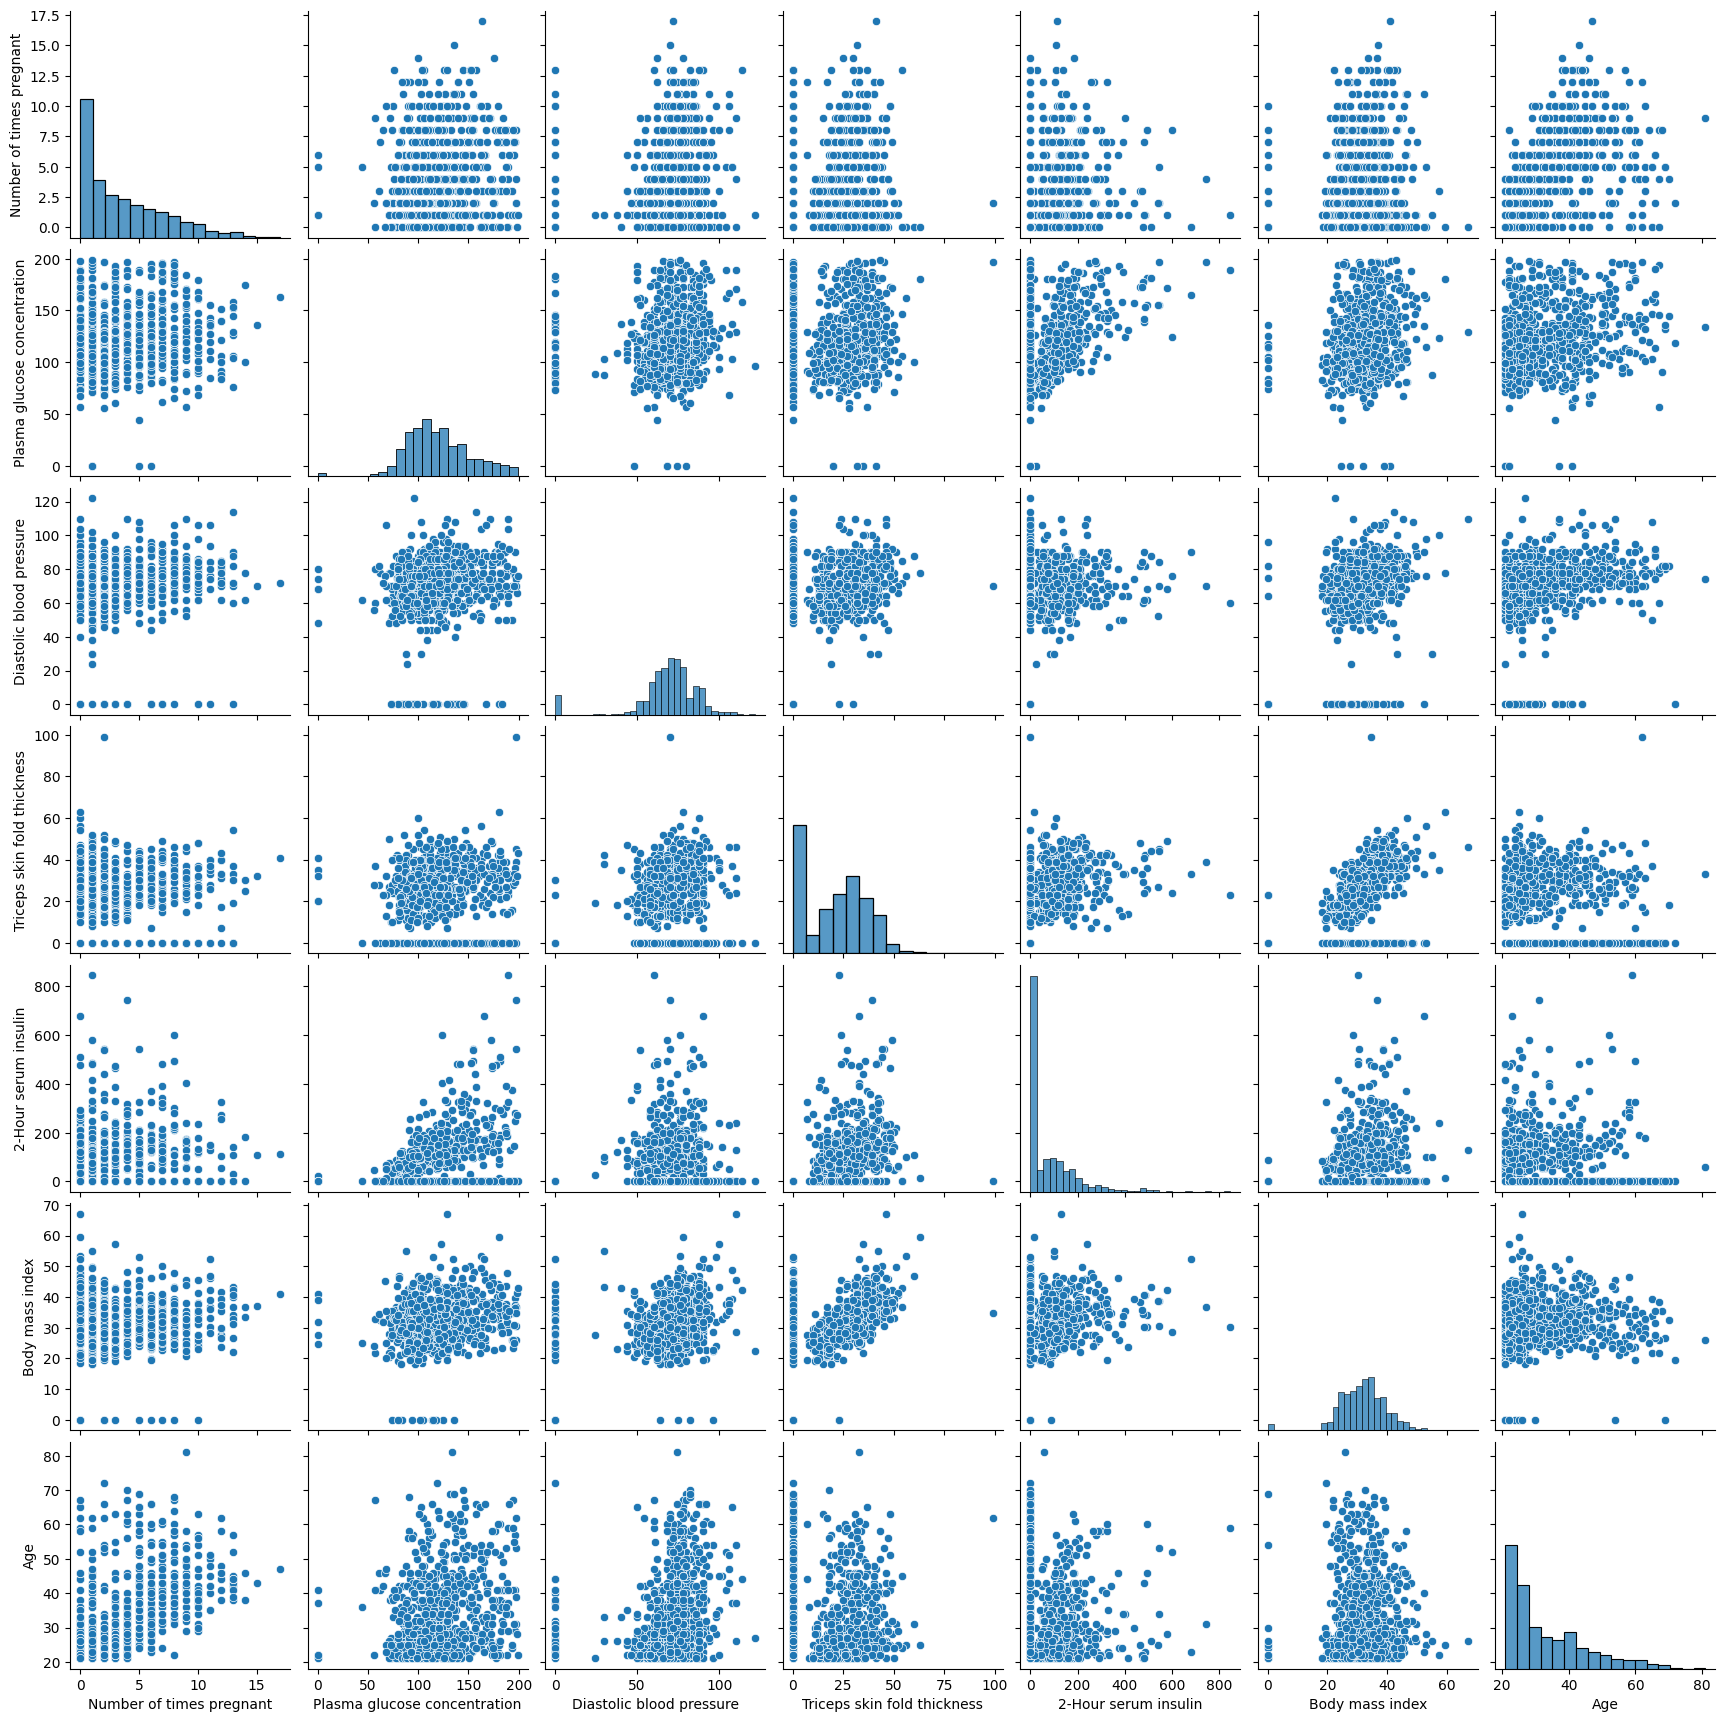

In [12]:
# Pairplot
sns.pairplot(df)

Data Preprocessing

In [13]:
# Extract x & y
# x = input, y = output
x = df.iloc[:,0:-1].values
y_string= list(df.iloc[:,-1])

In [14]:
x

array([[  6. , 148. ,  72. , ...,   0. ,  33.6,  50. ],
       [  1. ,  85. ,  66. , ...,   0. ,  26.6,  31. ],
       [  8. , 183. ,  64. , ...,   0. ,  23.3,  32. ],
       ...,
       [  5. , 121. ,  72. , ..., 112. ,  26.2,  30. ],
       [  1. , 126. ,  60. , ...,   0. ,  30.1,  47. ],
       [  1. ,  93. ,  70. , ...,   0. ,  30.4,  23. ]])

In [15]:
y_string

['positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',

In [16]:
# samples
print(x[:6])
print(y_string[:6])

[[  6.  148.   72.   35.    0.   33.6  50. ]
 [  1.   85.   66.   29.    0.   26.6  31. ]
 [  8.  183.   64.    0.    0.   23.3  32. ]
 [  1.   89.   66.   23.   94.   28.1  21. ]
 [  0.  137.   40.   35.  168.   43.1  33. ]
 [  5.  116.   74.    0.    0.   25.6  30. ]]
['positive', 'negative', 'positive', 'negative', 'positive', 'negative']


In [17]:
# convert y_string intto labels(1,0)
y_int = []
for string in y_string:
    if string == 'positive':
        y_int.append(1)
    else:
        y_int.append(0)

In [18]:
y_int

[1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,


In [19]:
# Now convert to an array
y = np.array(y_int, dtype = 'float64')

In [20]:
y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

Data Normalization

In [21]:
# Feature Normalization.
sc = StandardScaler()
x = sc.fit_transform(x)

In [22]:
x

array([[ 0.63994726,  0.84832379,  0.14964075, ..., -0.69289057,
         0.20401277,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.69289057,
        -0.68442195, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -0.69289057,
        -1.10325546, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ...,  0.27959377,
        -0.73518964, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.69289057,
        -0.24020459,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.69289057,
        -0.20212881, -0.87137393]])

In [23]:
x = torch.tensor(x)
y = torch.tensor(y).unsqueeze(1)

In [24]:
# convert numpy arrays to PyTorch tensors
x = torch.tensor(x)
#  array to 2D
y = torch.tensor(y).unsqueeze(1)

<ipython-input-24-7086cd4d8690>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
<ipython-input-24-7086cd4d8690>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y).unsqueeze(1)


In [25]:
print(x.shape)
print(y.shape)

torch.Size([768, 7])
torch.Size([768, 1, 1])


In [26]:
class Dataset(Dataset):

    def __init__(self,x,y):
        self.x = x
        self.y = y

    def __getitem__(self,index):
        # Get one item from the dataset
        return self.x[index], self.y[index]

    def __len__(self):
        return len(self.x)

In [27]:
dataset = Dataset(x,y)

In [28]:
len(dataset)

768

In [29]:
# Load the data to your dataloader for batch processing and shuffling
train_loader = torch.utils.data.DataLoader(dataset=dataset,
                                           batch_size=32,
                                           shuffle=True)

In [30]:
train_loader

In [31]:
print("There is {} batches in the dataset".format(len(train_loader)))
for (x,y) in train_loader:
    print("For one iteration (batch), there is:")
    print("Data:    {}".format(x.shape))
    print("Labels:  {}".format(y.shape))
    break

There is 24 batches in the dataset
For one iteration (batch), there is:
Data:    torch.Size([32, 7])
Labels:  torch.Size([32, 1, 1])


Bu

In [32]:
#  Now let's build the above network
class Model(nn.Module):
    def __init__(self, input_features):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_features, 5)
        self.fc2 = nn.Linear(5, 4)
        self.fc3 = nn.Linear(4, 3)
        self.fc4 = nn.Linear(3, 1)
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()

    def forward(self, x):
        out = self.fc1(x)
        out = self.tanh(out)
        out = self.fc2(out)
        out = self.tanh(out)
        out = self.fc3(out)
        out = self.tanh(out)
        out = self.fc4(out)
        out = self.sigmoid(out)
        return out

# **Building the Model**

In [35]:
# Create the network (an object of the Net class)
net = Model(x.shape[1])
# Loss function
criterion = torch.nn.BCELoss(size_average=True)
#optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9)

/usr/local/lib/python3.11/dist-packages/torch/nn/_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [39]:
# Train the network
num_epochs = 200
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        inputs = inputs.float()
        labels = labels.float()
        # Feed Forward
        output = net(inputs)
        # Loss Calculation

        loss = criterion(output, labels.squeeze(1))
        # Clear the gradient buffer (we don't want to accumulate gradients)
        optimizer.zero_grad()
        # Backpropagation
        loss.backward()
        # Weight Update: w <-- w - lr * gradient
        optimizer.step()

    # Accuracy
    output = (output > 0.5).float()
    accuracy = (output == labels).float().mean()
    # Print  statistics
    print("Epoch {}/{}, Loss: {:.3f}, Accuracy: {:.3f}".format(epoch + 1, num_epochs, loss, accuracy))

Epoch 1/200, Loss: 0.367, Accuracy: 0.523
Epoch 2/200, Loss: 0.314, Accuracy: 0.523
Epoch 3/200, Loss: 0.430, Accuracy: 0.500
Epoch 4/200, Loss: 0.432, Accuracy: 0.488
Epoch 5/200, Loss: 0.303, Accuracy: 0.500
Epoch 6/200, Loss: 0.440, Accuracy: 0.535
Epoch 7/200, Loss: 0.382, Accuracy: 0.492
Epoch 8/200, Loss: 0.374, Accuracy: 0.490
Epoch 9/200, Loss: 0.426, Accuracy: 0.623
Epoch 10/200, Loss: 0.441, Accuracy: 0.469
Epoch 11/200, Loss: 0.426, Accuracy: 0.582
Epoch 12/200, Loss: 0.695, Accuracy: 0.508
Epoch 13/200, Loss: 0.498, Accuracy: 0.637
Epoch 14/200, Loss: 0.296, Accuracy: 0.498
Epoch 15/200, Loss: 0.384, Accuracy: 0.488
Epoch 16/200, Loss: 0.207, Accuracy: 0.605
Epoch 17/200, Loss: 0.351, Accuracy: 0.568
Epoch 18/200, Loss: 0.251, Accuracy: 0.570
Epoch 19/200, Loss: 0.402, Accuracy: 0.523
Epoch 20/200, Loss: 0.361, Accuracy: 0.500
Epoch 21/200, Loss: 0.524, Accuracy: 0.504
Epoch 22/200, Loss: 0.272, Accuracy: 0.605
Epoch 23/200, Loss: 0.535, Accuracy: 0.578
Epoch 24/200, Loss: 